In [1]:
import random
from collections import OrderedDict

val_p = 1
val_n = 0

pA=[('A' * 20, val_p)],
pB=[('T' * 20, val_p)],
pC=[('C' * 20, val_p)],
pD=[('G' * 20, val_p)],
nA=[('A' * 20, val_n)],
nB=[('T' * 20, val_n)],
nC=[('C' * 20, val_n)],
nD=[('G' * 20, val_n)],

toy_env = OrderedDict(
    A = (1 * pC + 1 * pB + 1 * nD + 1 * nA),
    B = (1 * pA + 1 * pD + 1 * nC + 1 * nB),
    C = (1 * nD + 1 * nB + 1 * pA + 1 * nC),
    D = (1 * nD + 1 * nB + 1 * nA + 1 * pC),
    E = (1 * nD + 1 * nB + 1 * pA + 1 * nC),
    F = (1 * nD + 1 * pB + 1 * nA + 1 * nC),
    G = (1 * pD + 1 * nB + 1 * nA + 1 * nC),
    H = (1 * pA + 1 * pD + 1 * nC + 1 * nB),
    I = (1 * pC + 1 * pB + 1 * nD + 1 * nA),
    J = (1 * pA + 1 * pD + 1 * nC + 1 * nB),
    K = (1 * pC + 1 * pB + 1 * nD + 1 * nA),
    L = (1 * nC + 1 * nB + 1 * pA + 1 * nD),
    M = (1 * nD + 1 * pB + 1 * nA + 1 * nC),
)

data = OrderedDict()
for x in toy_env:
    data[x] = [i[0] for i in toy_env[x]]
    
genes = [x for x in data]
training = genes[:9]
testing = genes[9:]

In [2]:
print(data)

OrderedDict([('A', [('CCCCCCCCCCCCCCCCCCCC', 1), ('TTTTTTTTTTTTTTTTTTTT', 1), ('GGGGGGGGGGGGGGGGGGGG', 0), ('AAAAAAAAAAAAAAAAAAAA', 0)]), ('B', [('AAAAAAAAAAAAAAAAAAAA', 1), ('GGGGGGGGGGGGGGGGGGGG', 1), ('CCCCCCCCCCCCCCCCCCCC', 0), ('TTTTTTTTTTTTTTTTTTTT', 0)]), ('C', [('GGGGGGGGGGGGGGGGGGGG', 0), ('TTTTTTTTTTTTTTTTTTTT', 0), ('AAAAAAAAAAAAAAAAAAAA', 1), ('CCCCCCCCCCCCCCCCCCCC', 0)]), ('D', [('GGGGGGGGGGGGGGGGGGGG', 0), ('TTTTTTTTTTTTTTTTTTTT', 0), ('AAAAAAAAAAAAAAAAAAAA', 0), ('CCCCCCCCCCCCCCCCCCCC', 1)]), ('E', [('GGGGGGGGGGGGGGGGGGGG', 0), ('TTTTTTTTTTTTTTTTTTTT', 0), ('AAAAAAAAAAAAAAAAAAAA', 1), ('CCCCCCCCCCCCCCCCCCCC', 0)]), ('F', [('GGGGGGGGGGGGGGGGGGGG', 0), ('TTTTTTTTTTTTTTTTTTTT', 1), ('AAAAAAAAAAAAAAAAAAAA', 0), ('CCCCCCCCCCCCCCCCCCCC', 0)]), ('G', [('GGGGGGGGGGGGGGGGGGGG', 1), ('TTTTTTTTTTTTTTTTTTTT', 0), ('AAAAAAAAAAAAAAAAAAAA', 0), ('CCCCCCCCCCCCCCCCCCCC', 0)]), ('H', [('AAAAAAAAAAAAAAAAAAAA', 1), ('GGGGGGGGGGGGGGGGGGGG', 1), ('CCCCCCCCCCCCCCCCCCCC', 0), ('TTTTTTTTTTTTTTTT

In [3]:
from wolpertinger_net import *
sess = tf.Session()
net = WolpertingerNet(sess, lr=0.0001, knn=1)

In [4]:
tres = []
results = []
aloss = []
closs = []

In [5]:
for i in trange(100):
    for i in training:
        tres.append(net.train([(dna_vec(a), b) for a, b in data[i]], 2, 32))
    for i in testing:
        results.append(net.evaluate([(dna_vec(a), b) for a, b in data[i]], 1))

100%|██████████| 100/100 [06:48<00:00,  4.12s/it]


In [8]:
import matplotlib.pyplot as plt

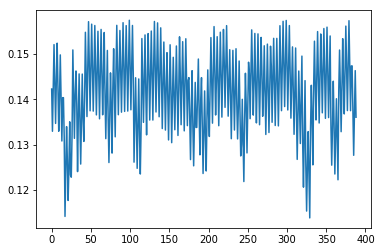

In [11]:
smooth = 10
graph = np.convolve(results, [1 / smooth] * smooth)[smooth:-smooth]
plt.plot(graph)

In [ ]:
for i in training:
    print(sorted(list(set(data[i]))))

In [ ]:
net.eps

In [6]:
for i in [testing[1]]:
    states, proto_actions, actions, rewards = (net.path([(dna_vec(a), b) for a, b in data[i]]))
    for state, proto, action, reward in zip(states, proto_actions, actions, rewards):
        seqs = [t for t, p in state]
        rewards = [p for t, p in state]
        for (t, p) in state:
            print(vec_dna(t), p, net.getQ(net.flat(np.array(seqs)), rewards, t))
        print('done:', vec_dna(proto), net.getQ(net.flat(np.array(seqs)), rewards, proto), vec_dna(action), reward)
    print('-' * 50)

TTTTTTTTTTTTTTTTTTTT 1 2.0685258
CCCCCCCCCCCCCCCCCCCC 1 1.6665723
AAAAAAAAAAAAAAAAAAAA 0 1.4859033
GGGGGGGGGGGGGGGGGGGG 0 1.9864657
AAAAAAAAAAAAAAAAAAAA 0 1.4859033
done: GGAATGGCTGTGTAGCCGTT 2.050655 GGGGGGGGGGGGGGGGGGGG 0
TTTTTTTTTTTTTTTTTTTT 1 2.5365117
CCCCCCCCCCCCCCCCCCCC 1 2.2452183
AAAAAAAAAAAAAAAAAAAA 0 1.8549458
AAAAAAAAAAAAAAAAAAAA 0 1.8549458
GGGGGGGGGGGGGGGGGGGG 0 1.3450471
done: AAGGTGGTTCCACGTTTACA 2.0717793 TTTTTTTTTTTTTTTTTTTT 1
TTTTTTTTTTTTTTTTTTTT 1 1.1599022
CCCCCCCCCCCCCCCCCCCC 1 1.5046697
TTTTTTTTTTTTTTTTTTTT 1 1.1599022
GGGGGGGGGGGGGGGGGGGG 0 1.2301024
TTTTTTTTTTTTTTTTTTTT 1 1.1599022
done: GGCCTTAATGCCCCTGACGA 1.3650427 CCCCCCCCCCCCCCCCCCCC 1
TTTTTTTTTTTTTTTTTTTT 1 2.2451537
CCCCCCCCCCCCCCCCCCCC 1 1.5677007
TTTTTTTTTTTTTTTTTTTT 1 2.2451537
TTTTTTTTTTTTTTTTTTTT 1 2.2451537
CCCCCCCCCCCCCCCCCCCC 1 1.5677007
done: CGCTTACTCCTAGCTCTCCT 1.5771947 CCCCCCCCCCCCCCCCCCCC 0.5
TTTTTTTTTTTTTTTTTTTT 1 1.3927644
CCCCCCCCCCCCCCCCCCCC 1 0.9259238
TTTTTTTTTTTTTTTTTTTT 1 1.3927644
